
Analyzing ADBE
Price at prediction: $612.47
Predicted  Price 90 days (using GARCH volatility): $703.93
Predicted Price Change: 91.46%
Real Price after 90 days: $551.82
Difference (Predicted - Real): 21.61%


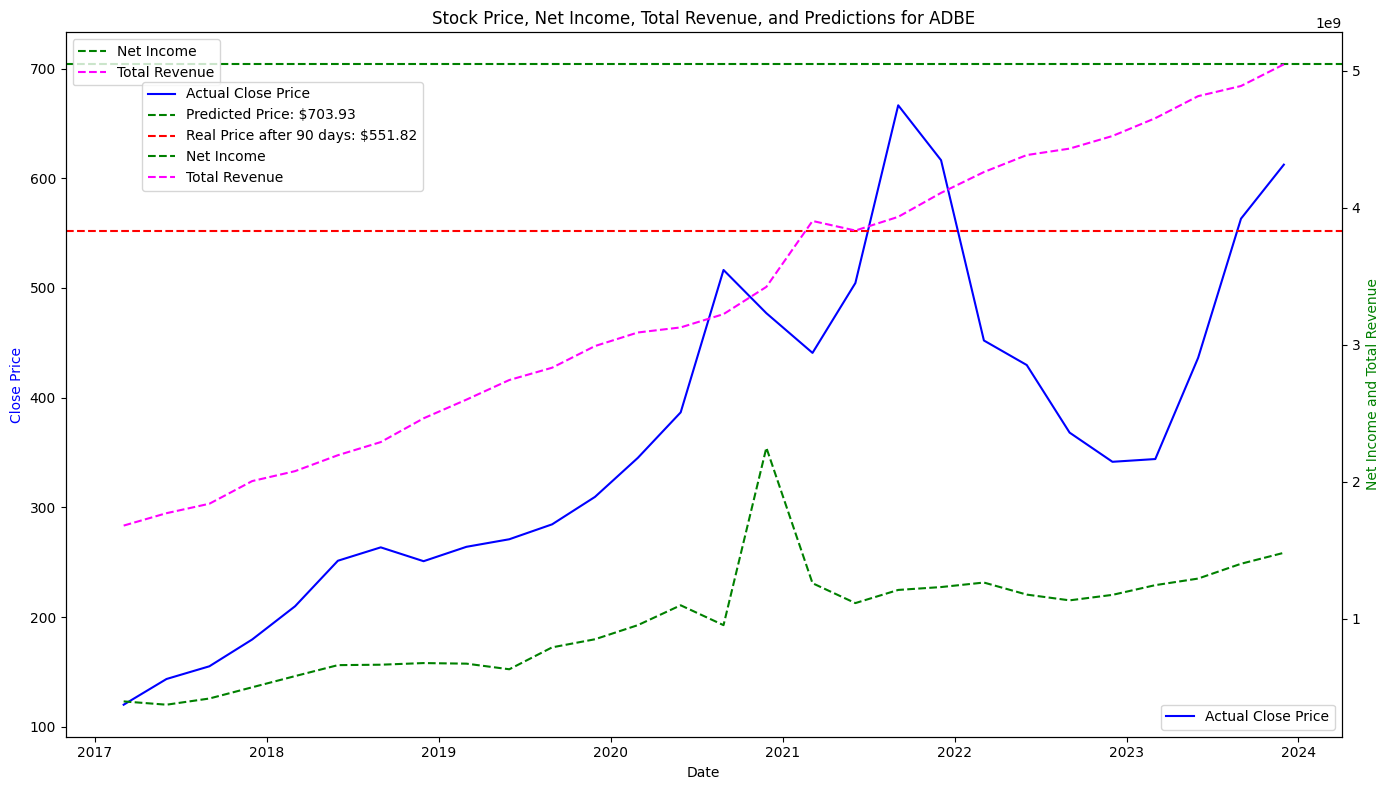


Analyzing ALGN
Price at prediction: $276.67
Predicted  Price 90 days (using GARCH volatility): $366.01
Predicted Price Change: 89.34%
Real Price after 90 days: $327.92
Difference (Predicted - Real): 10.41%


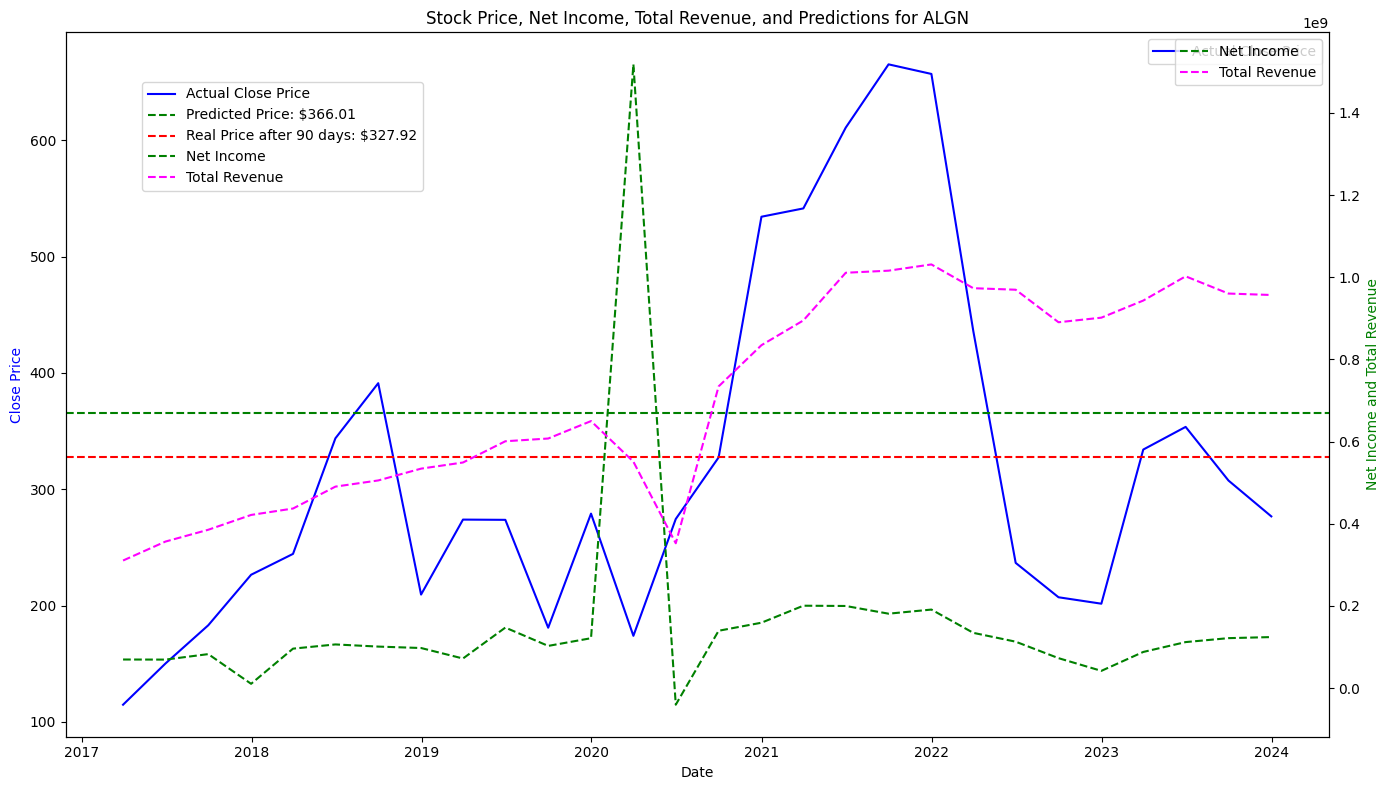


Analyzing ANET
Price at prediction: $236.97
Predicted  Price 90 days (using GARCH volatility): $291.19
Predicted Price Change: 54.22%
Real Price after 90 days: $289.98
Difference (Predicted - Real): 0.41%


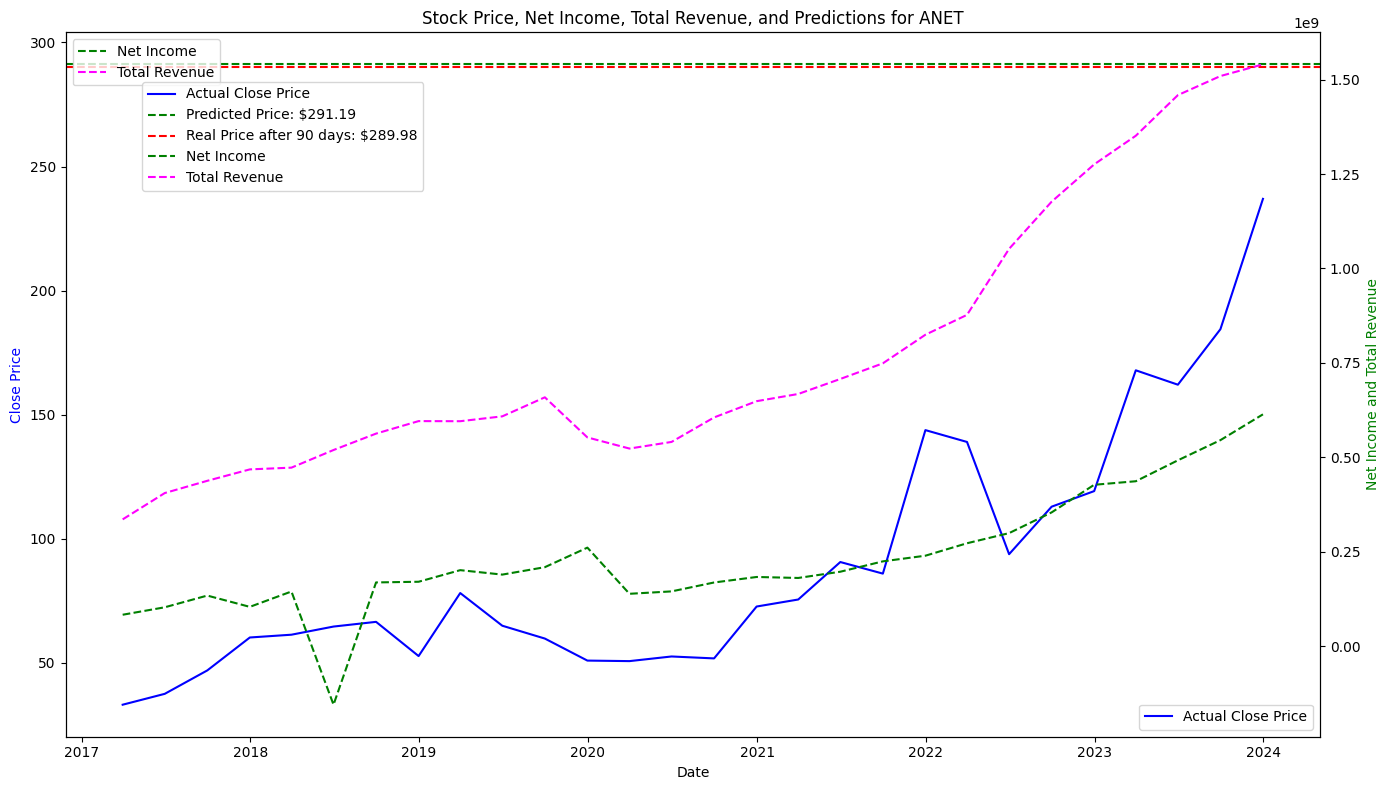


Analyzing FTNT
Price at prediction: $59.40
Predicted  Price 90 days (using GARCH volatility): $71.40
Predicted Price Change: 12.00%
Real Price after 90 days: $68.31
Difference (Predicted - Real): 4.33%


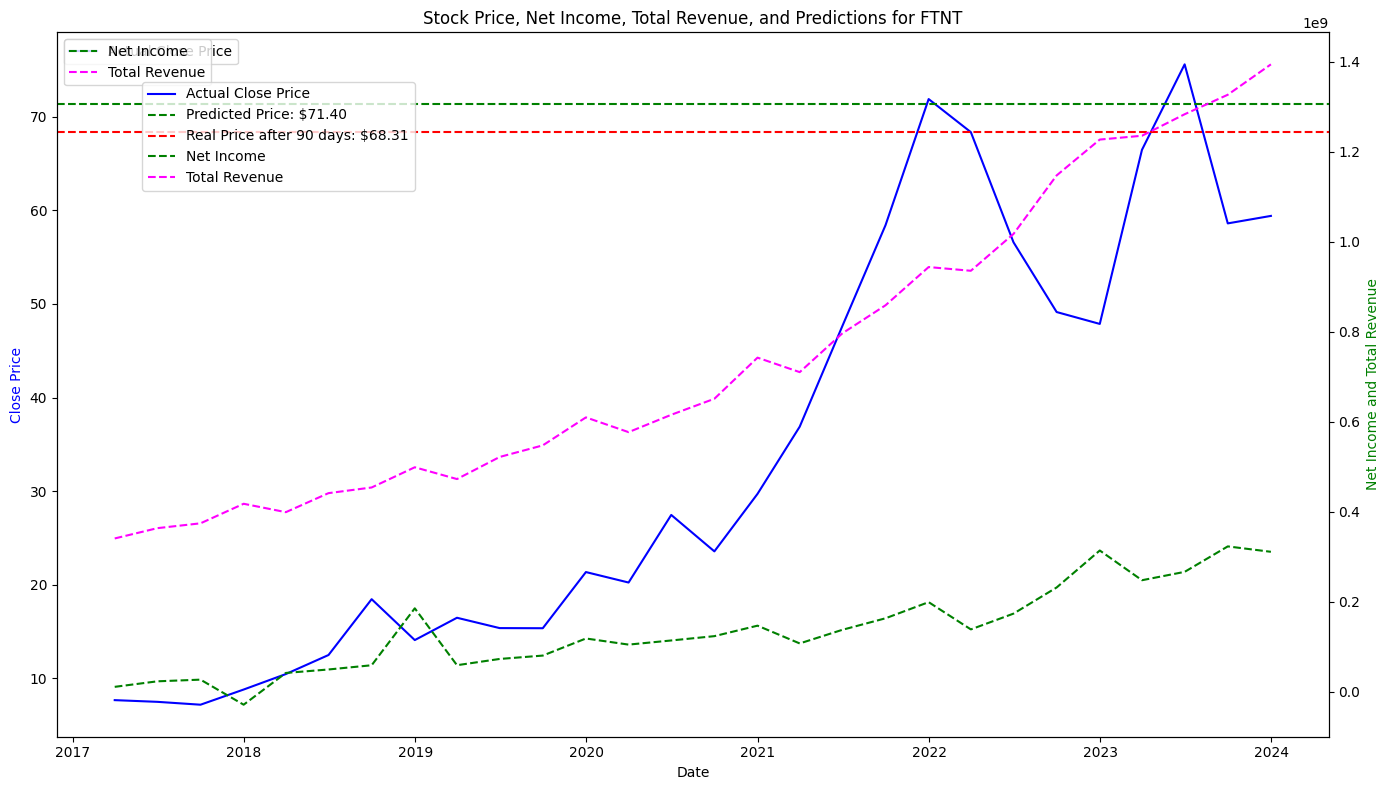


Analyzing IBM
Price at prediction: $159.28
Predicted  Price 90 days (using GARCH volatility): $185.41
Predicted Price Change: 26.13%
Real Price after 90 days: $187.44
Difference (Predicted - Real): -1.10%


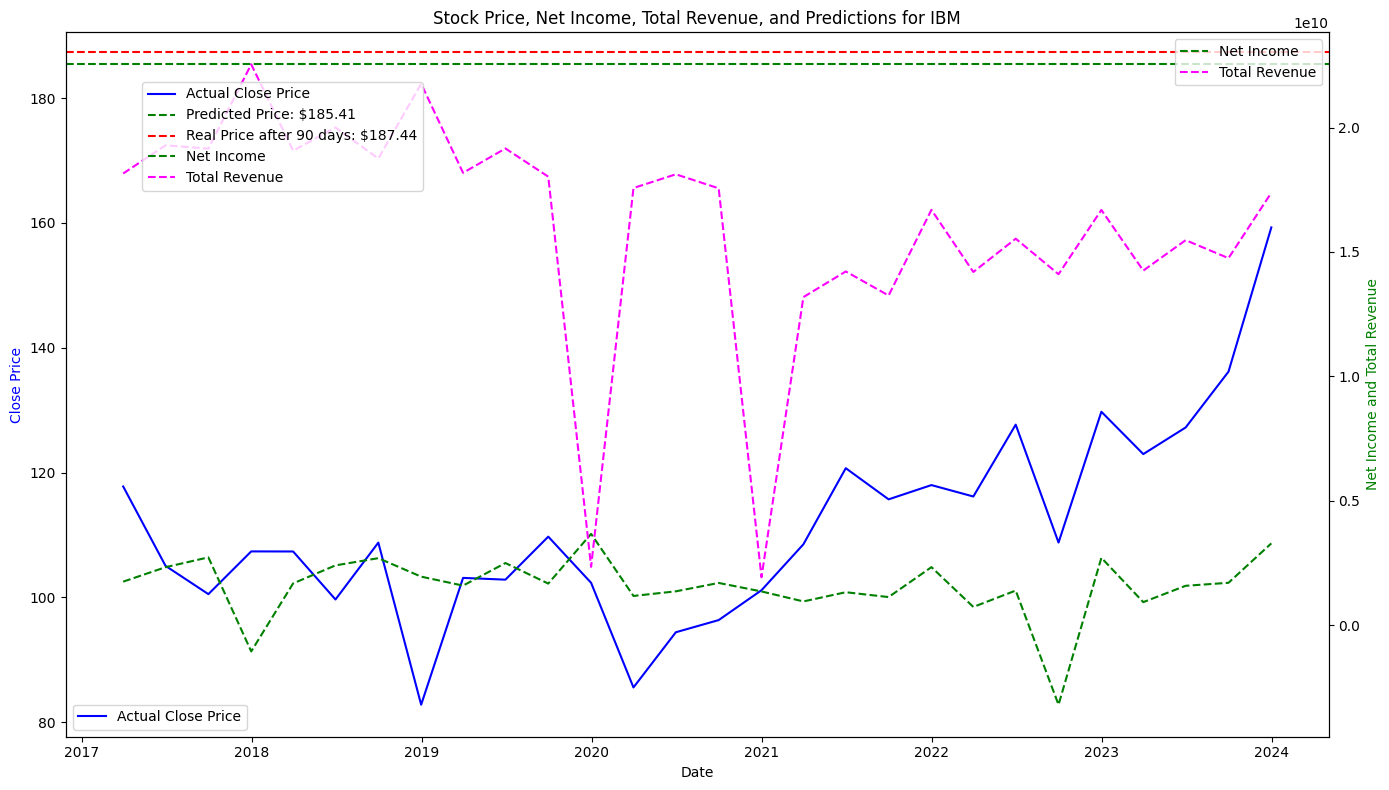


Analyzing INTC
Price at prediction: $49.72
Predicted  Price 90 days (using GARCH volatility): $59.28
Predicted Price Change: 9.56%
Real Price after 90 days: $43.71
Difference (Predicted - Real): 26.26%


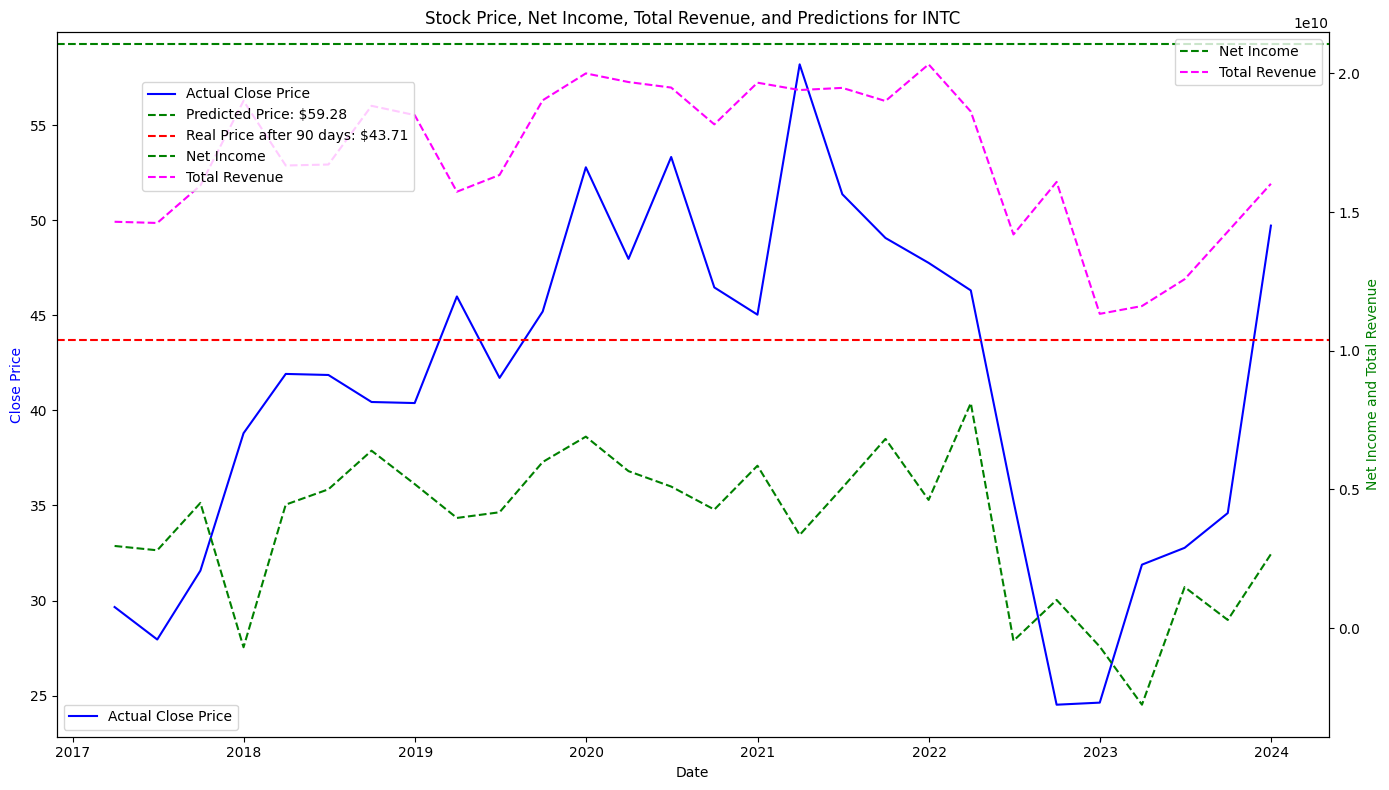


Analyzing IPGP
Price at prediction: $110.10
Predicted  Price 90 days (using GARCH volatility): $133.60
Predicted Price Change: 23.50%
Real Price after 90 days: $90.69
Difference (Predicted - Real): 32.12%


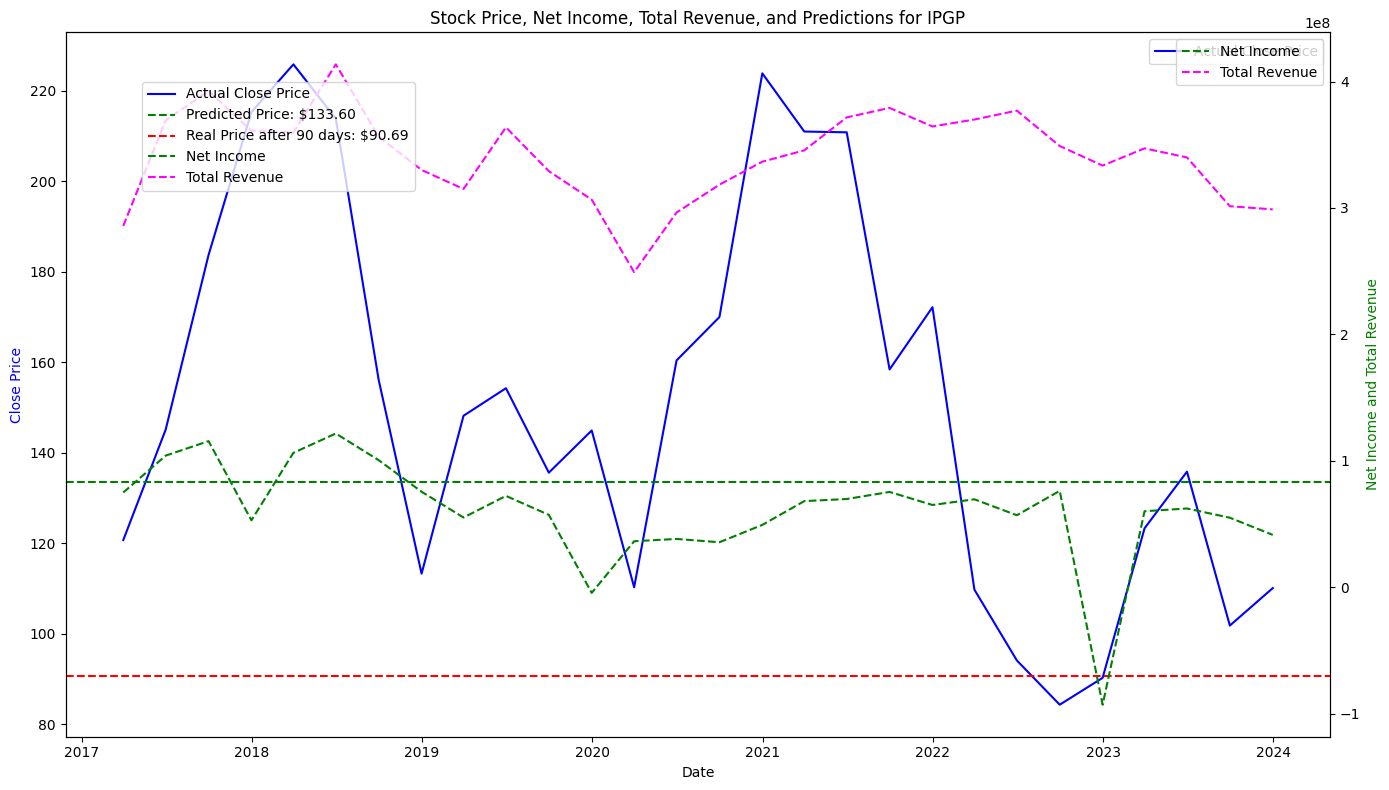


Analyzing JPM
Price at prediction: $166.33
Predicted  Price 90 days (using GARCH volatility): $191.32
Predicted Price Change: 25.00%
Real Price after 90 days: $198.04
Difference (Predicted - Real): -3.51%


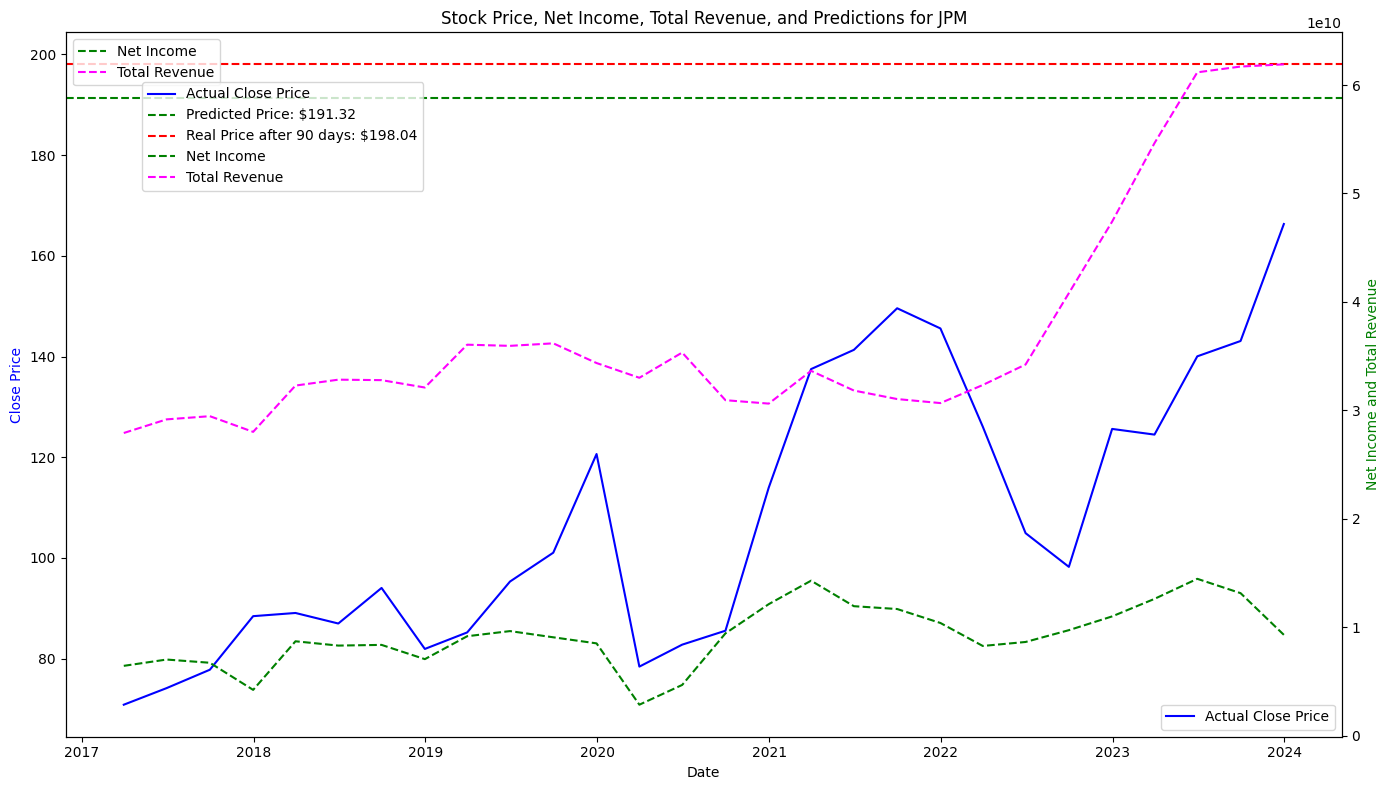


Analyzing MCD
Price at prediction: $290.58
Predicted  Price 90 days (using GARCH volatility): $315.87
Predicted Price Change: 25.30%
Real Price after 90 days: $278.51
Difference (Predicted - Real): 11.83%


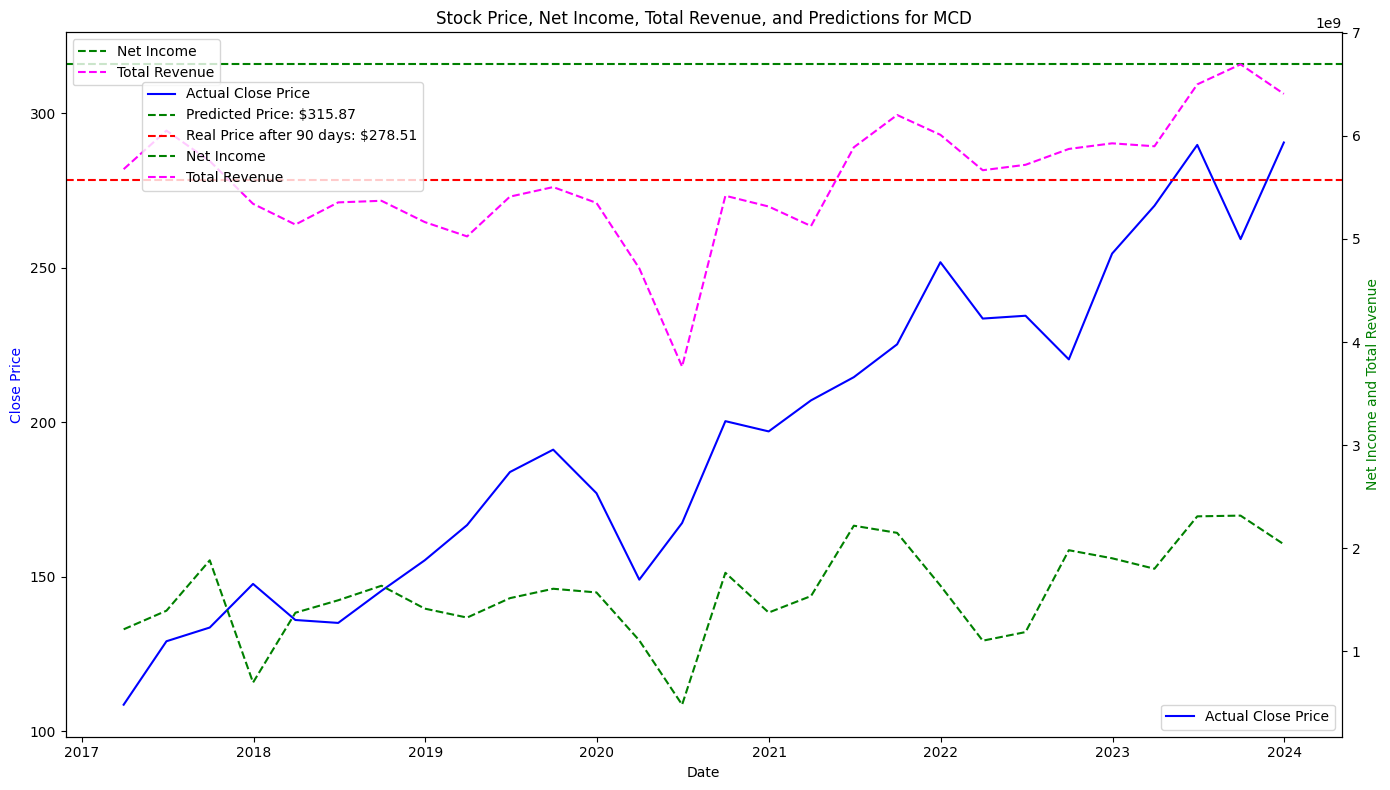


Analyzing META
Price at prediction: $357.24
Predicted  Price 90 days (using GARCH volatility): $460.21
Predicted Price Change: 102.96%
Real Price after 90 days: $484.64
Difference (Predicted - Real): -5.31%


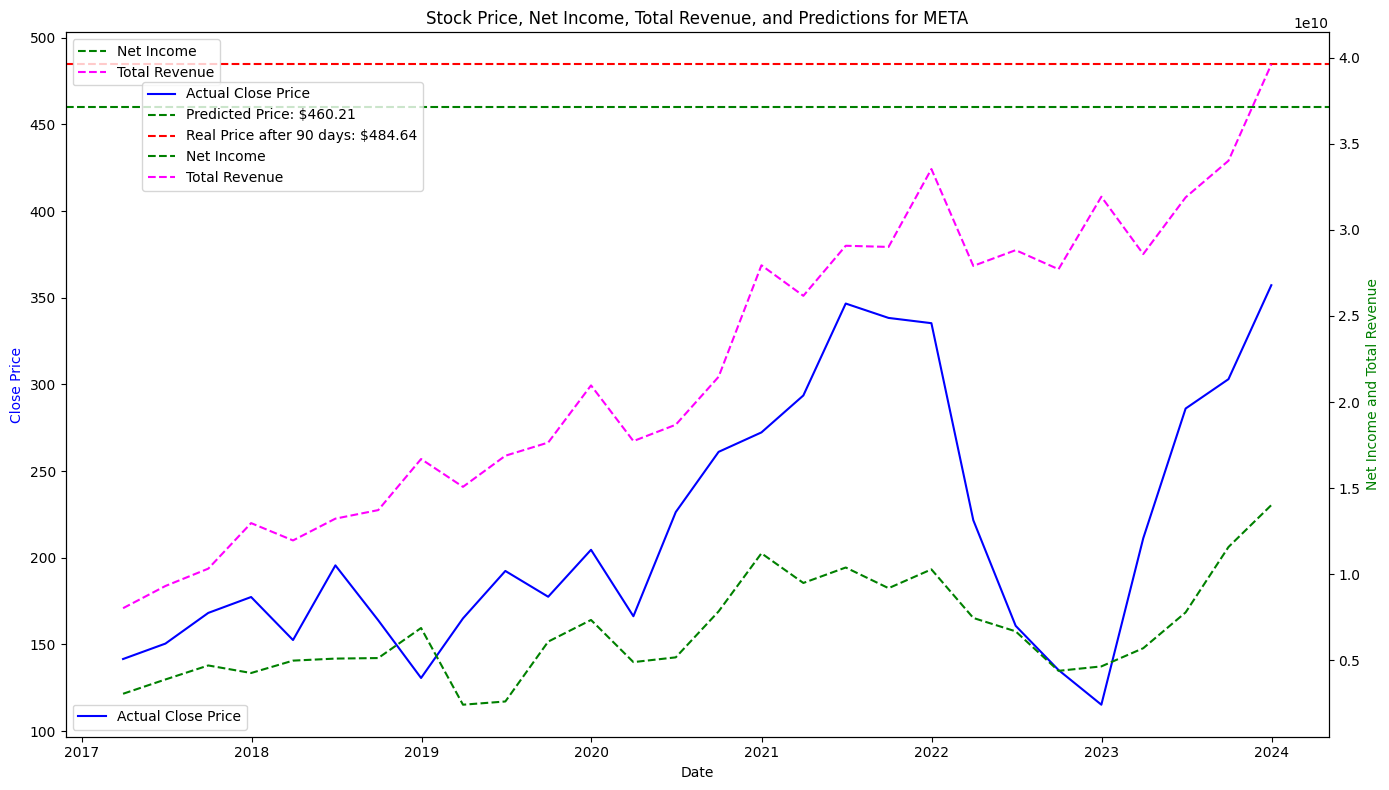


Analyzing MSFT
Price at prediction: $373.24
Predicted  Price 90 days (using GARCH volatility): $419.51
Predicted Price Change: 46.27%
Real Price after 90 days: $419.21
Difference (Predicted - Real): 0.07%


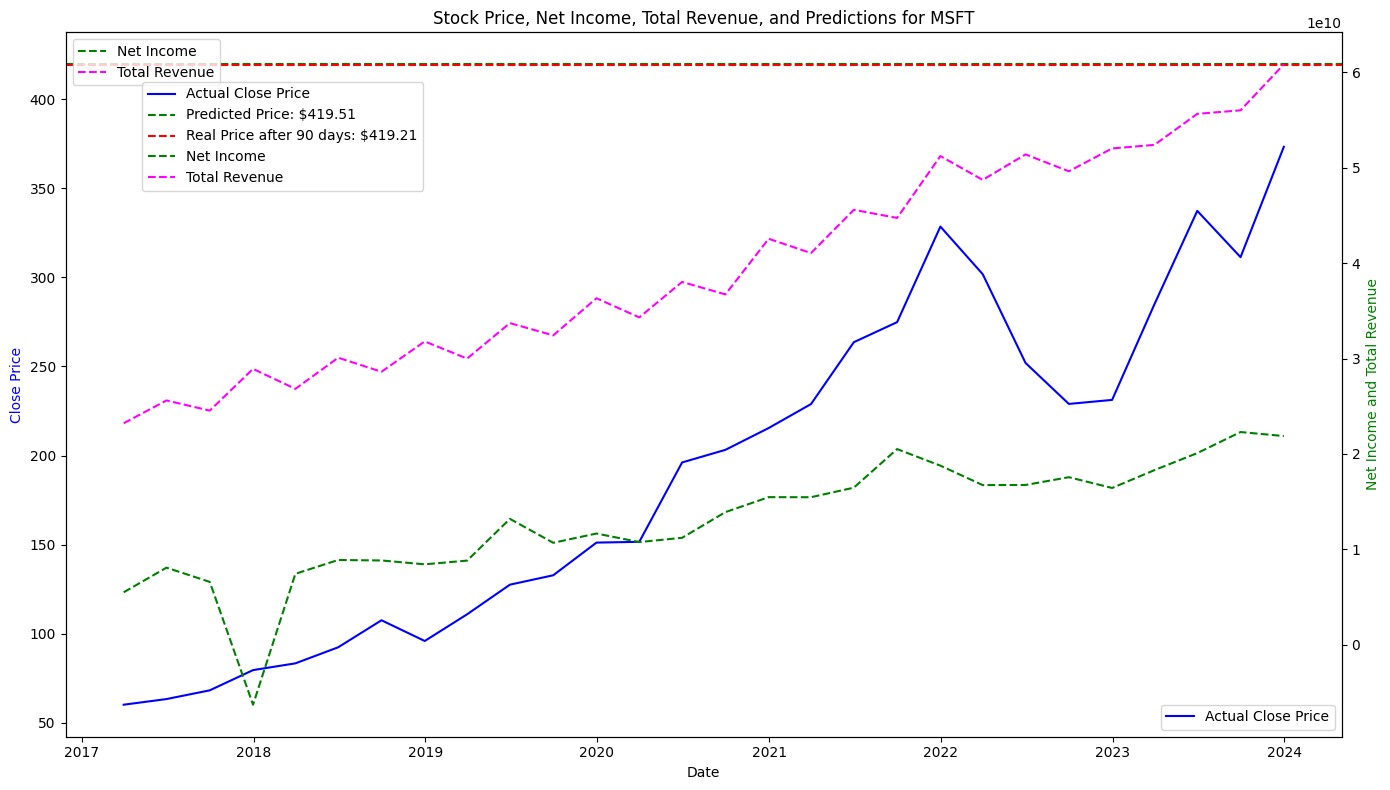


Analyzing MU
Price at prediction: $75.79
Predicted  Price 90 days (using GARCH volatility): $89.39
Predicted Price Change: 13.60%
Real Price after 90 days: $91.68
Difference (Predicted - Real): -2.56%


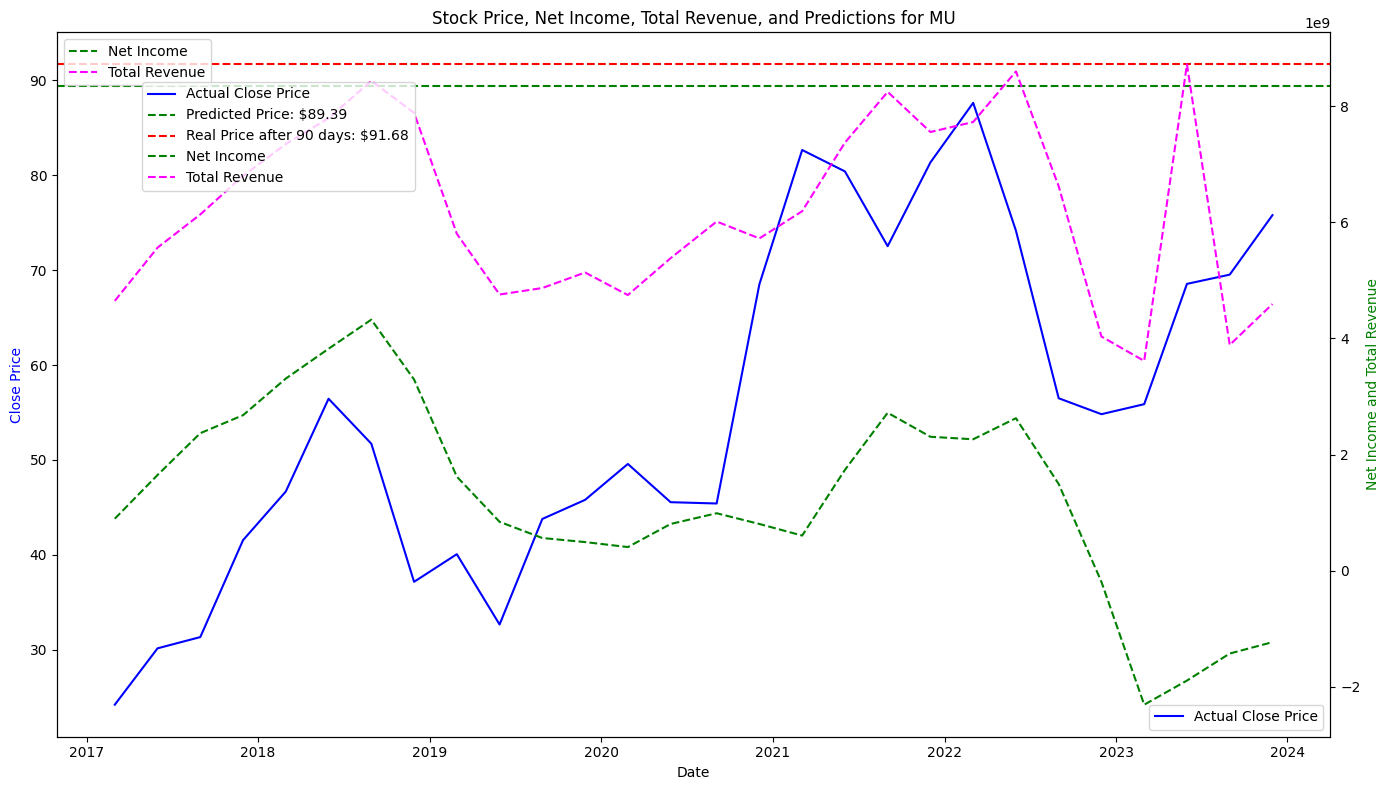


Analyzing NVDA
Price at prediction: $40.31
Predicted  Price 90 days (using GARCH volatility): $52.48
Predicted Price Change: 12.17%
Real Price after 90 days: $61.02
Difference (Predicted - Real): -16.26%


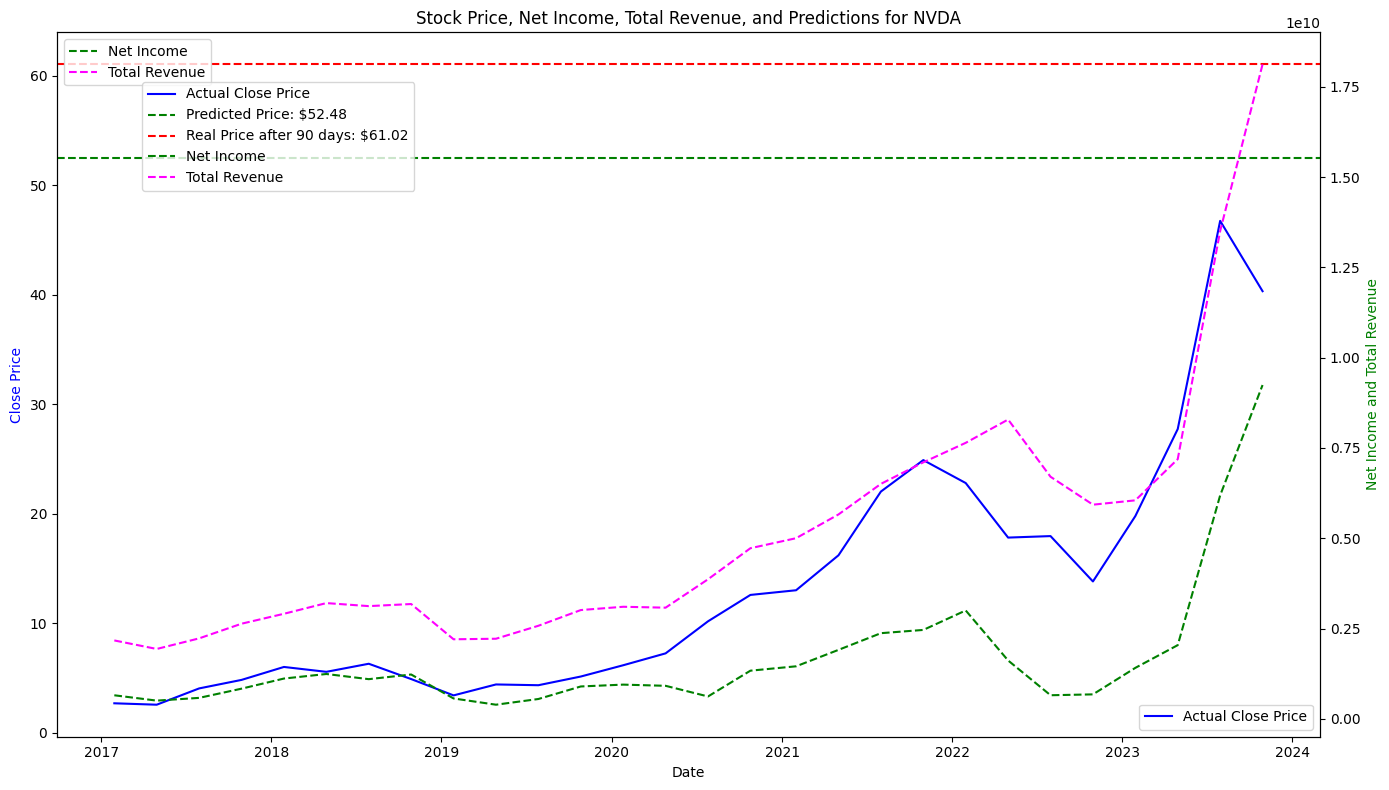


Analyzing PYPL
Price at prediction: $63.08
Predicted  Price 90 days (using GARCH volatility): $79.79
Predicted Price Change: 16.71%
Real Price after 90 days: $66.99
Difference (Predicted - Real): 16.05%


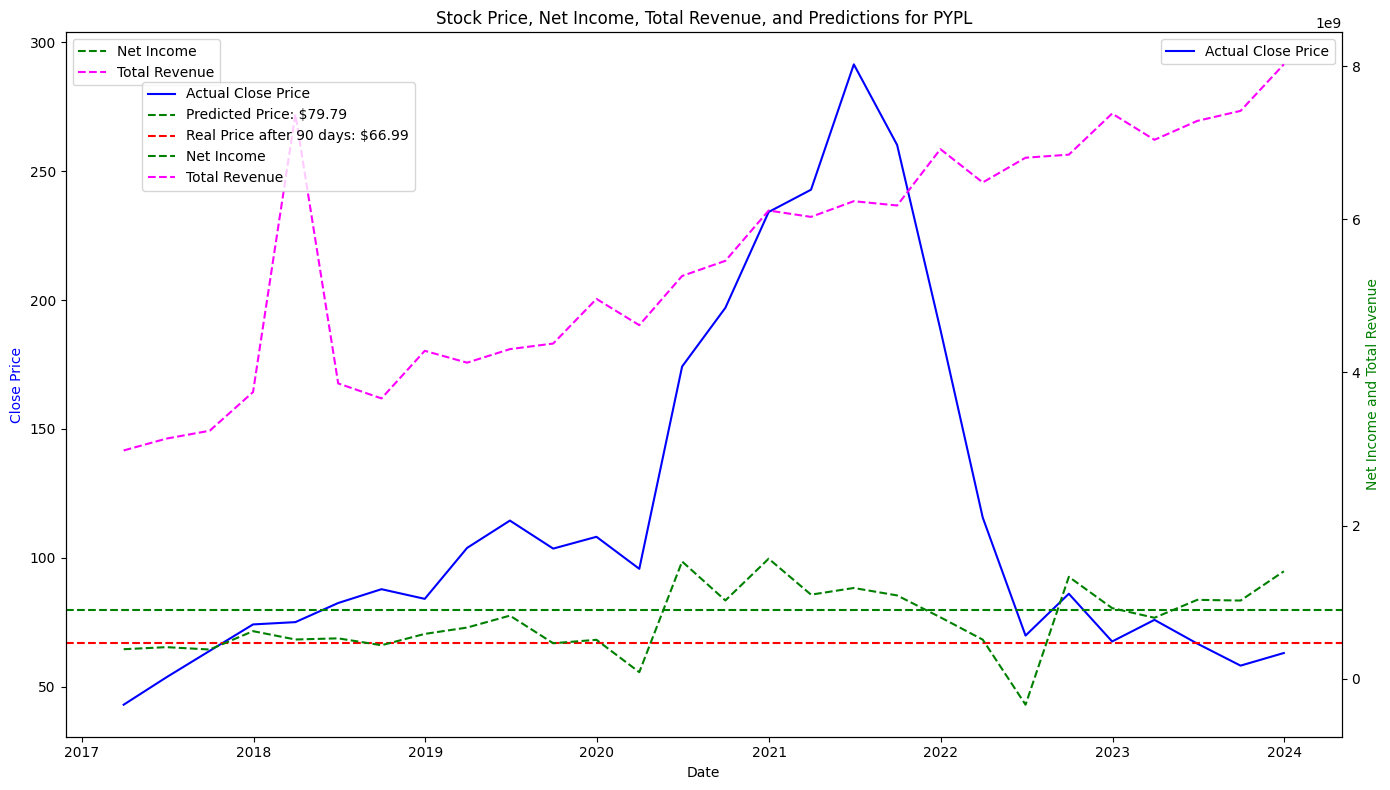


Analyzing QLYS
Price at prediction: $198.29
Predicted  Price 90 days (using GARCH volatility): $228.52
Predicted Price Change: 30.23%
Real Price after 90 days: $166.87
Difference (Predicted - Real): 26.98%


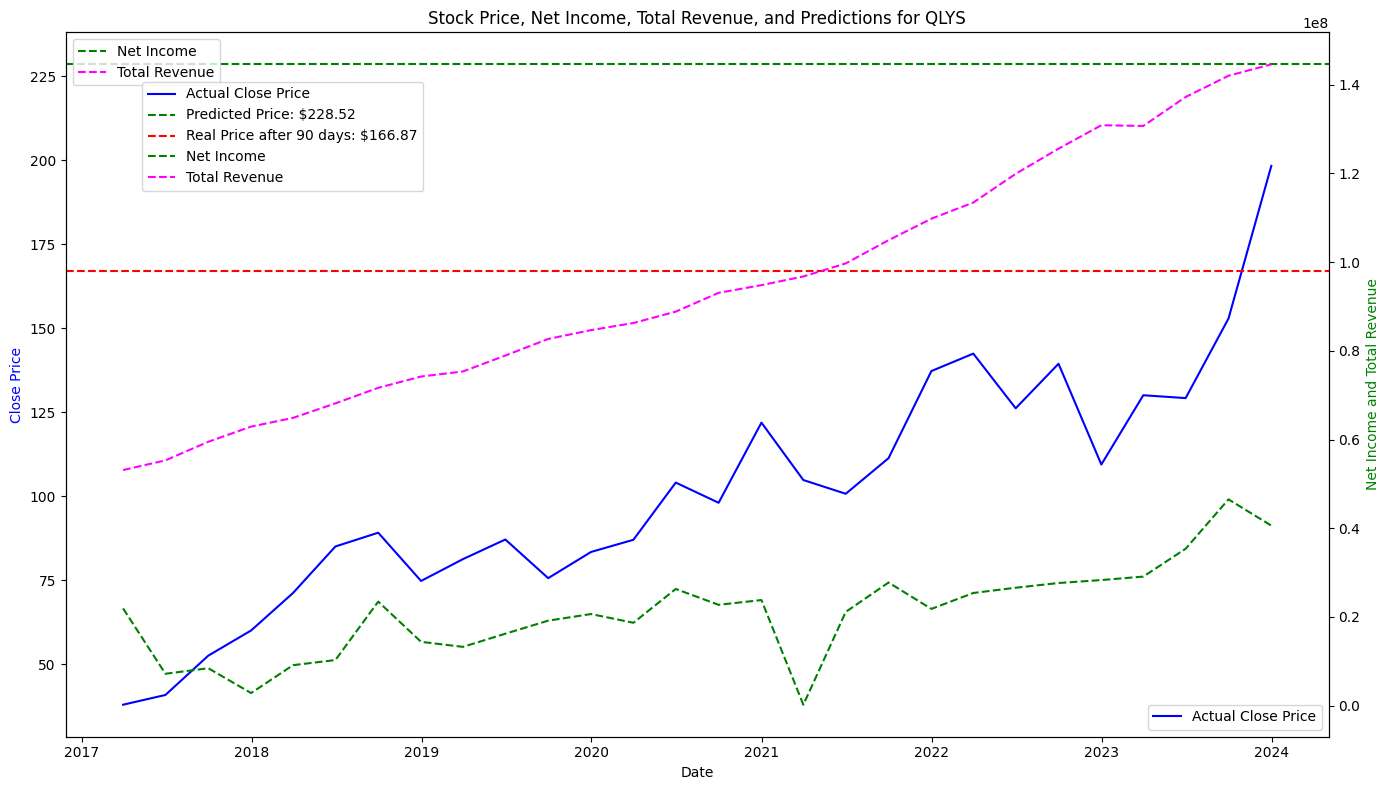


Analyzing REGN
Price at prediction: $881.70
Predicted  Price 90 days (using GARCH volatility): $998.47
Predicted Price Change: 116.77%
Real Price after 90 days: $962.49
Difference (Predicted - Real): 3.60%


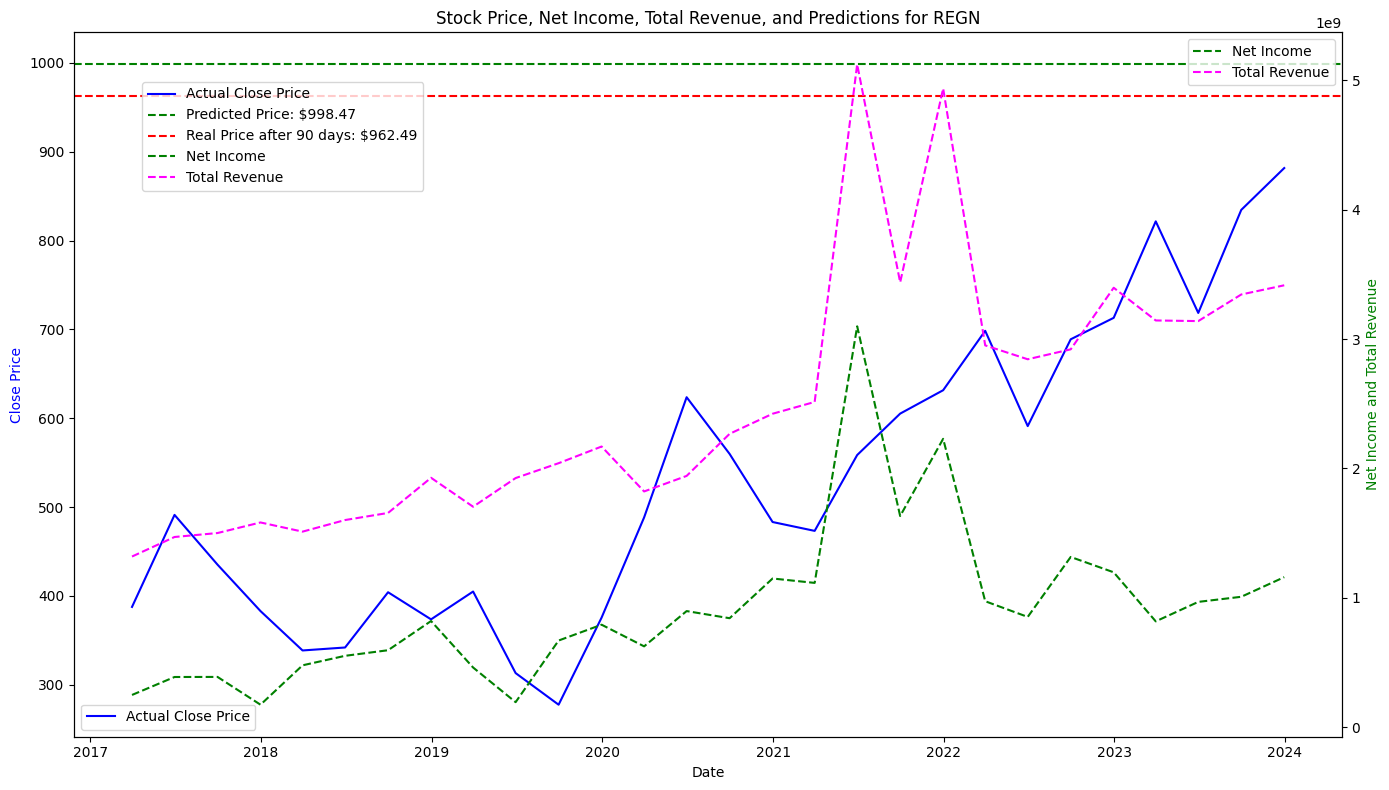


Analyzing SHAK
Price at prediction: $75.49
Predicted  Price 90 days (using GARCH volatility): $97.03
Predicted Price Change: 21.54%
Real Price after 90 days: $104.03
Difference (Predicted - Real): -7.21%


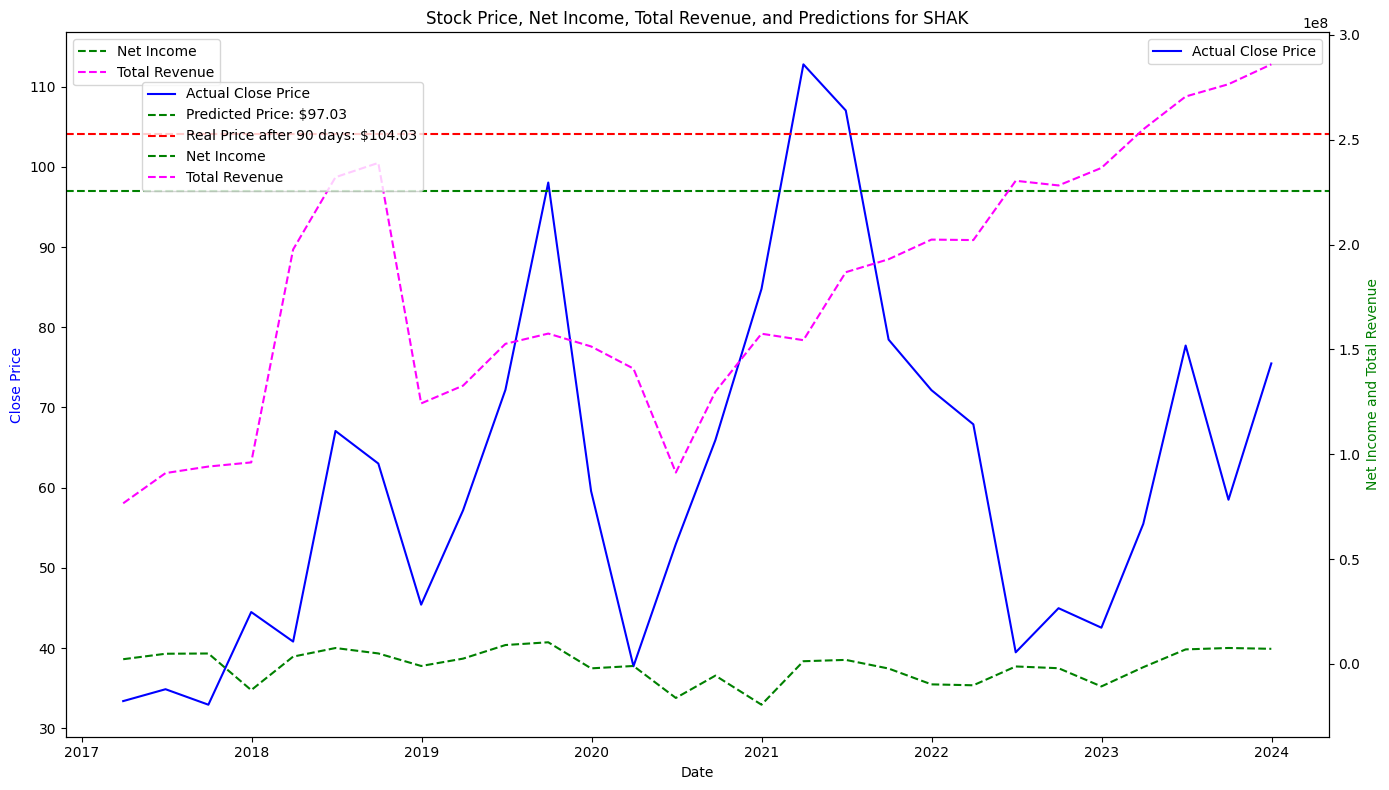


Analyzing VZ
Price at prediction: $35.15
Predicted  Price 90 days (using GARCH volatility): $38.08
Predicted Price Change: 2.93%
Real Price after 90 days: $40.00
Difference (Predicted - Real): -5.05%


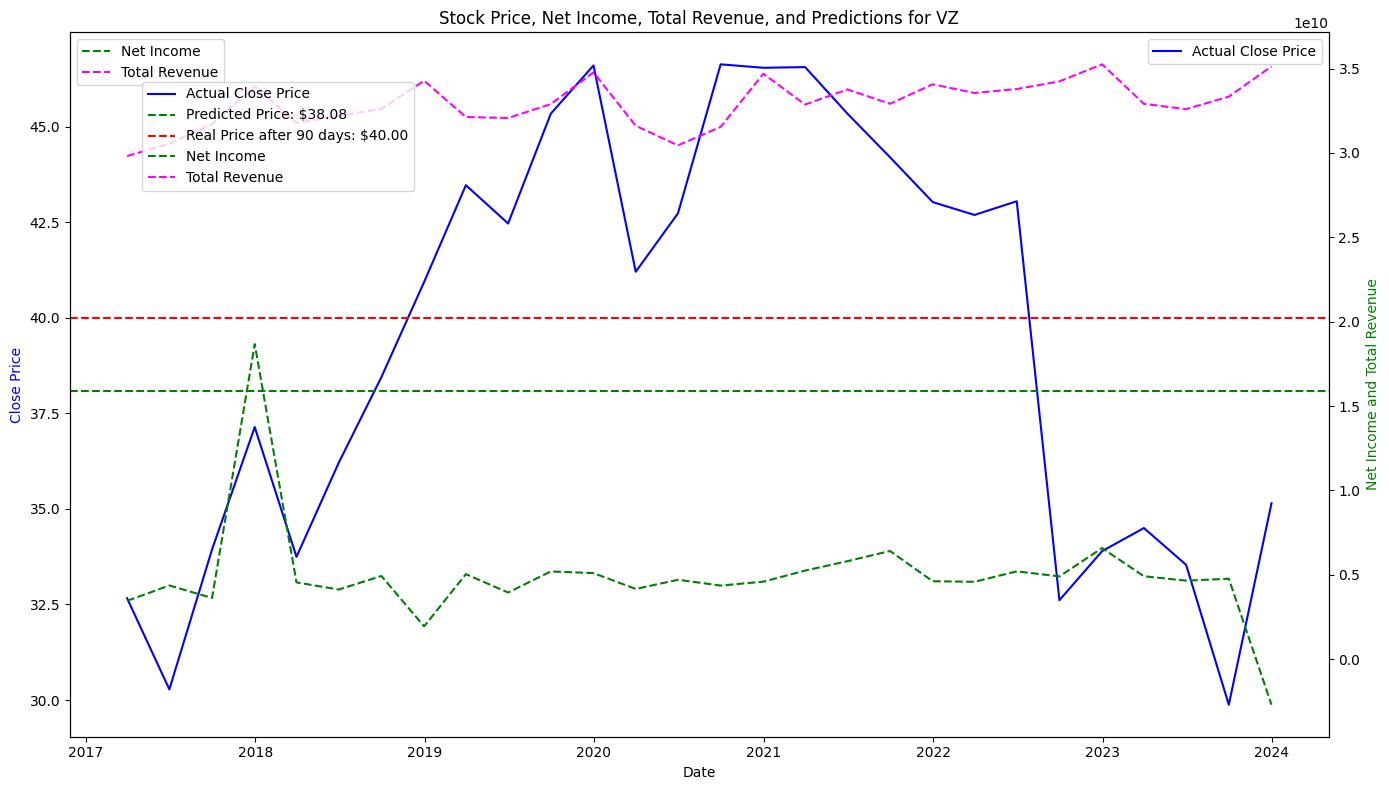


Results saved to 'stock_predictions_with_real_prices_garch.xlsx'


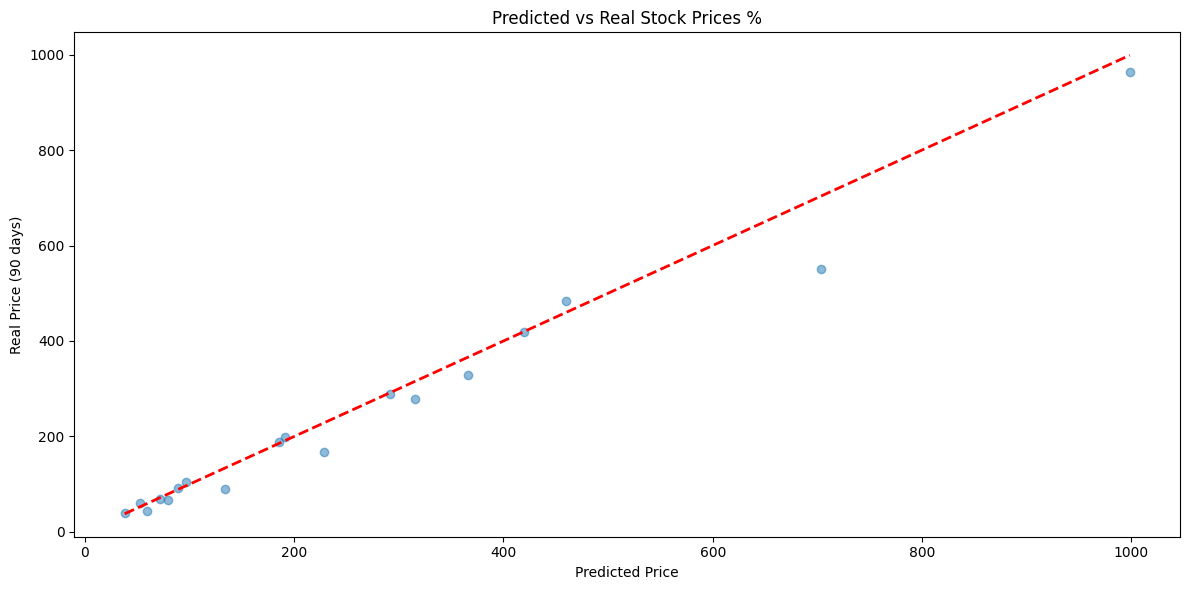

Visualization saved as 'predicted_vs_real_prices_garch.png'

Summary of Results:
Stock  Price at prediction:  Predicted Price  Price Change          MSE  Real Price (90 days)  Price Difference (Predicted - Real)
 ADBE            612.469971       703.927317     91.457346  8364.446208            551.820007                            21.608383
 ALGN            276.670013       366.011354     89.341341  7981.875145            327.920013                            10.407147
 ANET            236.970001       291.188129     54.218128  2939.605378            289.980011                             0.414893
 FTNT             59.400002        71.403279     12.003278   144.078676             68.309998                             4.332128
  IBM            159.282471       185.408705     26.126235   682.580137            187.443573                            -1.097504
 INTC             49.724052        59.284911      9.560859    91.410025             43.714012                            26.264523
 I

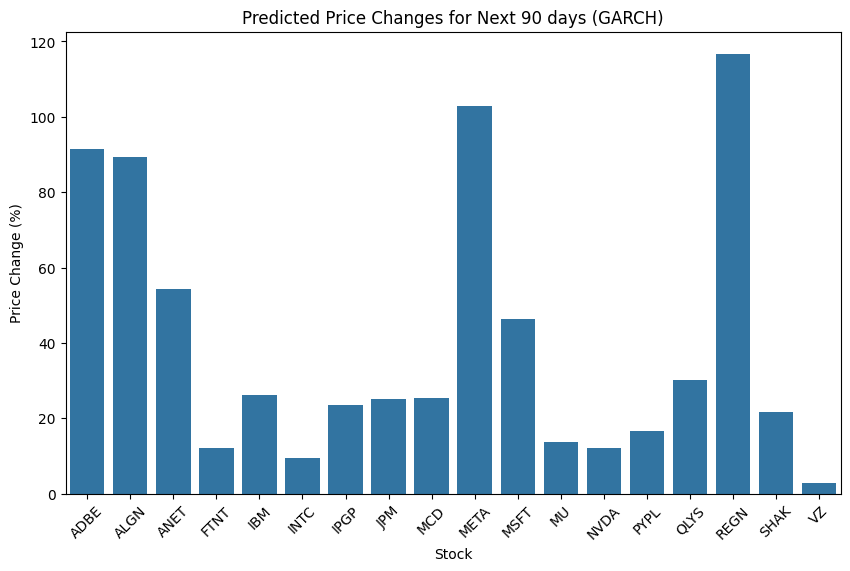

In [7]:
import os

# Ensure 'graphs' directory exists
if not os.path.exists('graphs'):
    os.makedirs('graphs')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import yfinance as yf
from arch import arch_model
from datetime import timedelta

# Load the data
df = pd.read_excel('allstocks.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Stock Name', 'Date'])

# Prepare data for GARCH
def prepare_data_garch(data):
    return data.set_index('Date')['Close'].pct_change().dropna() * 100  # Use percentage returns

# Train and predict with GARCH
def train_predict_garch(train_data, steps=30):
    model = arch_model(train_data, vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=steps)
    return pred.variance.iloc[-1].values  # Return the predicted variance for the last forecast

# Analyze and predict for each stock
results = []
for stock_name in df['Stock Name'].unique():
    print(f"\nAnalyzing {stock_name}")
    stock_data = df[df['Stock Name'] == stock_name].sort_values('Date')
    # Prepare data
    train_data = prepare_data_garch(stock_data)

    # Train and predict with GARCH
    pred_variance = train_predict_garch(train_data, steps=90)
    # Convert variance to volatility (standard deviation)
    volatility_pred = np.sqrt(pred_variance)
    volatility_pred = volatility_pred[0] if isinstance(volatility_pred, np.ndarray) else volatility_pred
    current_price = stock_data['Close'].iloc[-1]
    predicted_price_change = current_price * (volatility_pred / 100)
    predicted_price_change = predicted_price_change.item() if isinstance(predicted_price_change, np.ndarray) else predicted_price_change
    next_month_pred = current_price + predicted_price_change
    print(f"Price at prediction: ${current_price:.2f}")
    print(f"Predicted  Price 90 days (using GARCH volatility): ${next_month_pred:.2f}")
    print(f"Predicted Price Change: {predicted_price_change:.2f}%")

    # Get real price 90 days later
    last_date = stock_data['Date'].iloc[-1]
    future_date = last_date + timedelta(days=90)
    ticker = yf.Ticker(stock_name)
    future_data = ticker.history(start=last_date, end=future_date)
    if not future_data.empty:
        real_price = future_data['Close'].iloc[-1]
        price_difference = (next_month_pred - real_price) * 100 / next_month_pred
    else:
        real_price = None
        price_difference = None

    print(f"Real Price after 90 days: ${real_price:.2f}" if real_price else "Real Price after 90 days: Not available")
    print(f"Difference (Predicted - Real): {price_difference:.2f}%" if price_difference else "Difference: Not available")

    results.append({
        'Stock': stock_name,
        'Price at prediction:': current_price,
        'Predicted Price': next_month_pred,
        'Price Change': predicted_price_change,
        'MSE': mean_squared_error([current_price], [next_month_pred]),
        'Real Price (90 days)': real_price,
        'Price Difference (Predicted - Real)': price_difference
    })

    # Plotting graphs for each stock
    fig, ax1 = plt.subplots(figsize=(14, 8))

    ax2 = ax1.twinx()
    sns.lineplot(data=stock_data, x='Date', y='Close', ax=ax1, label='Actual Close Price', color='blue')

    if 'Net Income' in stock_data.columns:
        sns.lineplot(data=stock_data, x='Date', y='Net Income', ax=ax2, label='Net Income', linestyle='--', color='green')

    if 'Total Revenue' in stock_data.columns:
        sns.lineplot(data=stock_data, x='Date', y='Total Revenue', ax=ax2, label='Total Revenue', linestyle='--', color='magenta')

    ax1.axhline(next_month_pred, color='green', linestyle='--', label=f'Predicted Price: ${next_month_pred:.2f}')
    if real_price is not None:
        ax1.axhline(real_price, color='red', linestyle='--', label=f'Real Price after 90 days: ${real_price:.2f}')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price', color='blue')
    ax2.set_ylabel('Net Income and Total Revenue', color='green')

    plt.title(f"Stock Price, Net Income, Total Revenue, and Predictions for {stock_name}")
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'graphs/{stock_name}_stock_prediction.png')
    plt.show()

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
results_df.to_excel('stock_predictions_with_real_prices_garch.xlsx', index=False)
print("\nResults saved to 'stock_predictions_with_real_prices_garch.xlsx'")

plt.figure(figsize=(12, 6))
plt.scatter(results_df['Predicted Price'], results_df['Real Price (90 days)'], alpha=0.5)
plt.plot([results_df['Predicted Price'].min(), results_df['Predicted Price'].max()],
         [results_df['Predicted Price'].min(), results_df['Predicted Price'].max()],
         'r--', lw=2)
plt.xlabel('Predicted Price')
plt.ylabel('Real Price (90 days)')
plt.title('Predicted vs Real Stock Prices %')
plt.tight_layout()
plt.savefig('predicted_vs_real_prices_garch.png')
plt.show()
print("Visualization saved as 'predicted_vs_real_prices_garch.png'")

# Print summary of results
print("\nSummary of Results:")
print(results_df.to_string(index=False))

# Visualize predicted price changes
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='Price Change', data=results_df)
plt.title('Predicted Price Changes for Next 90 days (GARCH)')
plt.xlabel('Stock')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)
plt.show()



